In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
dataset=pd.read_csv("labeled_data.csv")
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
dataset.drop(['count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [4]:
dataset['class']=dataset['class'].apply(lambda x:0 if x==2 else 1)

/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

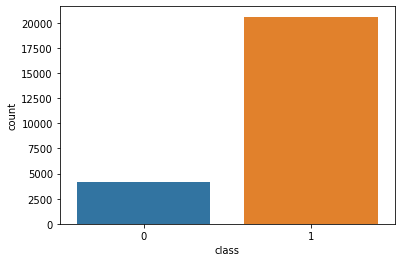

In [5]:
import seaborn as sb
sb.countplot(dataset['class'])

<AxesSubplot:>

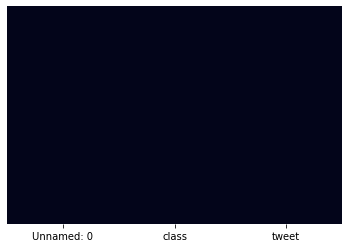

In [6]:
sb.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [7]:
print(dataset.groupby(['class']).size())

class
0     4163
1    20620
dtype: int64


In [8]:
dataset.shape

(24783, 3)

In [9]:
todrop=[]
count=0
for ind,row in  dataset.iterrows():
  if(row['class']==1):
    todrop.append(ind)
    count+=1
  if count==10000:
    break

In [10]:
dataset.drop(todrop,inplace=True)

In [11]:
print(dataset.groupby(['class']).size())

class
0     4163
1    10620
dtype: int64


/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

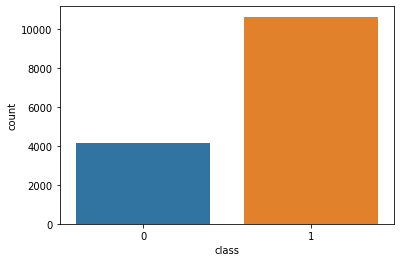

In [12]:
sb.countplot(dataset['class'])

In [13]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
                           "]+", flags=re.UNICODE)
    emoji_pattern.sub('',text);
    return text;

In [14]:
def clean_dataset(text):
    sentence=remove_emojis(text)
    sentence=re.sub('[^a-zA-Z]',' ',sentence)
    sentence=re.sub(r'\s+[a-zA-Z]\s+',' ',sentence)
    sentence=re.sub(r'\s+',' ',sentence)
    return sentence

In [15]:
# Preprocessing tweets
for ind,row in dataset.iterrows():
  row['tweet']=clean_dataset(row['tweet'])

In [16]:
dataset['tweet']

0        !!! RT @mayasolovely: As a woman you shouldn't...
40         " momma said no pussy cats inside my doghouse "
63       "@Addicted2Guys: -SimplyAddictedToGuys http://...
66       "@AllAboutManFeet: http://t.co/3gzUpfuMev" woo...
67       "@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 14783, dtype: object

In [17]:
x=dataset['tweet']
y=dataset['class']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
train_data=cv.fit_transform(x_train)
test_data=cv.transform(x_test)

/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

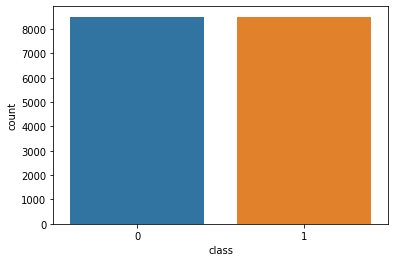

In [20]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority',random_state=7)
x,y=sm.fit_resample(train_data,y_train)
sb.countplot(y)

In [21]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x,y)

MultinomialNB()

In [22]:
predictions=model.predict(test_data)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       841
           1       0.92      0.97      0.94      2116

    accuracy                           0.92      2957
   macro avg       0.91      0.88      0.89      2957
weighted avg       0.92      0.92      0.91      2957

[[ 664  177]
 [  72 2044]]


In [24]:
data=list(y_test)
comments=list(x_test)
for i in range(5):
  print("prediction  - ",predictions[i],"   real - ",data[i])

prediction  -  1    real -  1
prediction  -  1    real -  1
prediction  -  1    real -  1
prediction  -  1    real -  1
prediction  -  1    real -  1


In [26]:
# Predicting on single comment
comment1=input("Enter the comment - ")
comment2=input("Enter 2nd comment - ")
vec1=cv.transform([comment1])
vec2=cv.transform([comment2])
prediction1 = model.predict(vec1)
prediction2 = model.predict(vec2)
print("comment - ",comment1,"   prediction - ",prediction1)
print("comment - ",comment2,"   prediction - ",prediction2)

Enter the comment - Have a nice day sir
Enter 2nd comment - Stop this or i will kick your ass
comment -  Have a nice day sir    prediction -  [0]
comment -  Stop this or i will kick your ass    prediction -  [1]


In [31]:
import pickle
pickle.dump(model,open("model.pkl",'wb'))
pickle.dump(cv,open("cv.pkl",'wb'))

In [32]:
saved_model=pickle.load(open("model.pkl",'rb'))
saved_cv=pickle.load(open("cv.pkl",'rb'))

In [50]:
test_comment=comments[232]

In [52]:
x=saved_cv.transform([test_comment])
test_predict=saved_model.predict(x)
print(test_predict)

[0]
